# ŸÖÿ¥ÿ±Ÿàÿπ ÿ™ŸÜŸÇŸäÿ® ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ‚Äì ÿßŸÑŸáŸàÿßÿ™ŸÅ ÿßŸÑÿ∞ŸÉŸäÿ©


In [160]:
# -*- coding: utf-8 -*-

# 1Ô∏è‚É£ ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.cluster import KMeans

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

In [161]:
# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
df = pd.read_csv("smartphones.csv")
# ÿπÿ±ÿ∂ ÿ£ŸàŸÑ 5 ÿµŸÅŸàŸÅ
df.head()

Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage   Color Free  Final Price  
0   8.0    256.0  Yellow  Yes       231.60  
1   4.0    128.0    Blue  Yes       279.00  
2   4.0    128.0    Blue  Yes       179.01  
3   6.0    128.0    Gray  Yes       279.99  
4  12.0    512.0   White  Yes       799.00

# ÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÇÿ®ŸÑ ÿßŸÑÿ®ÿØÿß ŸÅŸä ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ

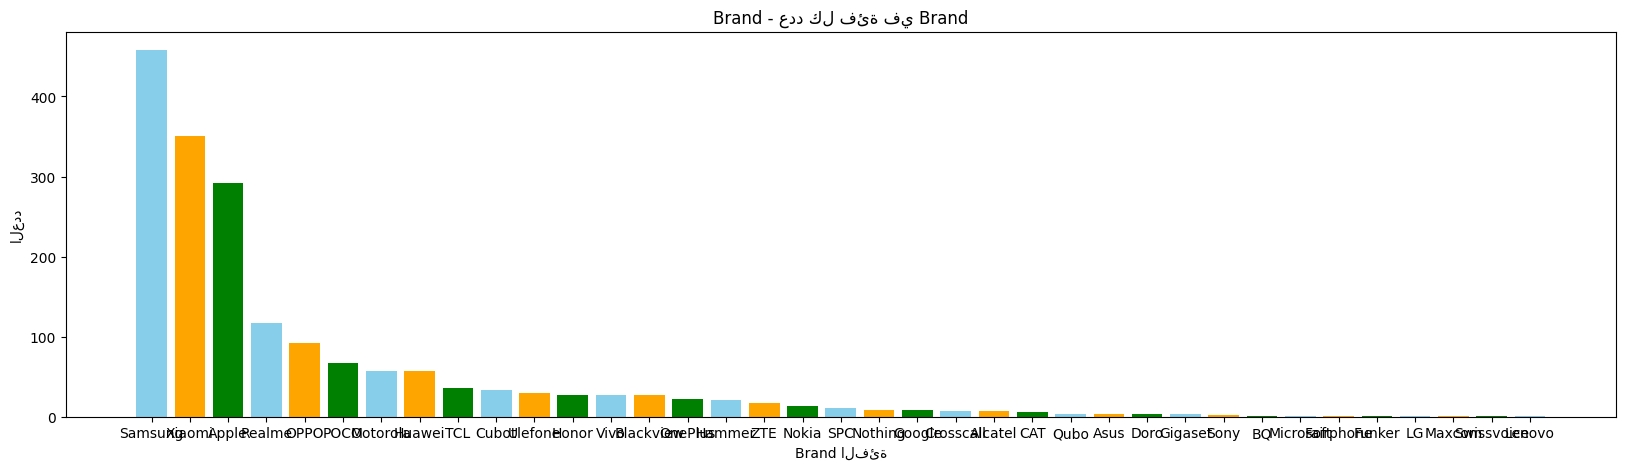

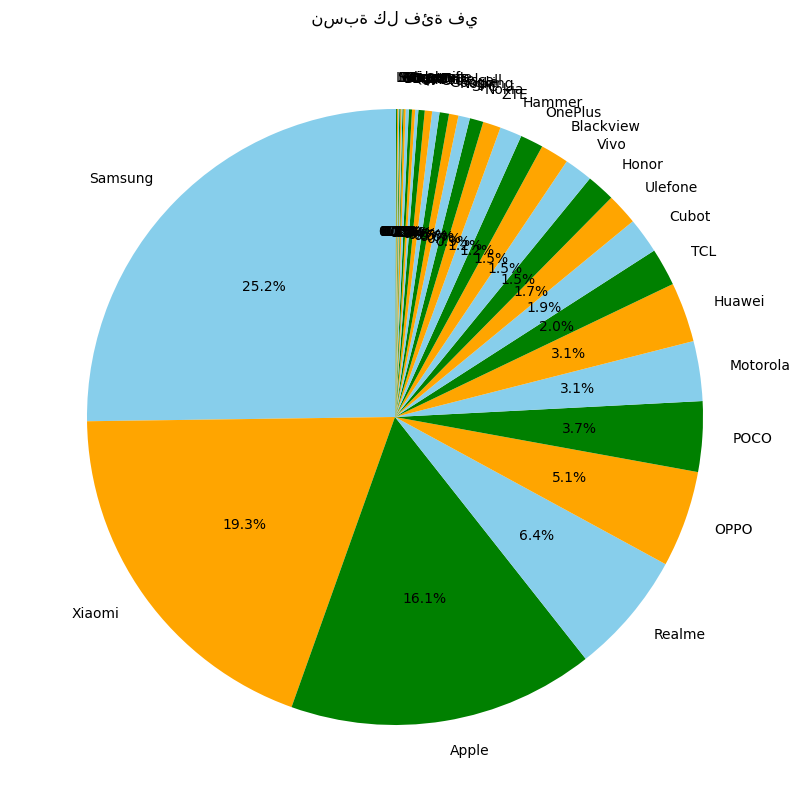

In [162]:
# -------------------------------
# ÿ•ÿπÿØÿßÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä
# -------------------------------
category_counts = df['Brand'].value_counts()  # ÿπÿØÿØ ŸÉŸÑ ŸÅÿ¶ÿ© ŸÅŸä ÿßŸÑÿπŸÖŸàÿØ Category

# -------------------------------
# 1Ô∏è‚É£ ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ÿπŸÖŸàÿØŸä (Bar Chart)
# -------------------------------
plt.figure(figsize=(20,5))
plt.bar(category_counts.index, category_counts.values, color=['skyblue','orange','green'])
plt.title('Brand - ÿπÿØÿØ ŸÉŸÑ ŸÅÿ¶ÿ© ŸÅŸä Brand')
plt.xlabel('Brand ÿßŸÑŸÅÿ¶ÿ©')
plt.ylabel('ÿßŸÑÿπÿØÿØ')
plt.show()

# -------------------------------
# 2Ô∏è‚É£ ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ÿØÿßÿ¶ÿ±Ÿä (Pie Chart)
# -------------------------------
plt.figure(figsize=(10,10))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=['skyblue','orange','green'], startangle=90)
plt.title(' ŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ© ŸÅŸä ')
plt.show()

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [164]:
print(len(df))

1816


In [165]:
df_copy = df.copy()

# ÿ≠ÿ∞ŸÅ ÿßŸÑŸÑŸàŸÜ ŸÑÿßŸÜŸá ÿ∫Ÿäÿ± ŸÖŸáŸÖ ŸÅŸä ÿßŸÑÿ≥ÿπÿ± ÿ∫ÿßŸÑÿ®ÿß

In [166]:
df.drop(columns=['Color'], inplace=True, errors='ignore')
df.head()

Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage Free  Final Price  
0   8.0    256.0  Yes       231.60  
1   4.0    128.0  Yes       279.00  
2   4.0    128.0  Yes       179.01  
3   6.0    128.0  Yes       279.99  
4  12.0    512.0  Yes       799.00

<h1>ÿ≠ÿ≥ÿßÿ® ÿπÿØÿØ ÿßŸÑÿ™ŸÉÿ±ÿßÿ± ŸÑŸÉŸÑ ŸÖŸÜ ÿßŸÑŸáŸàÿßÿ™ŸÅ ŸàÿßŸÑŸÖŸàÿØŸäŸÑ Ÿà ÿßÿ≥ŸÖ ÿßŸÑÿ¥ÿ±ŸÉÿ©<h1>

In [167]:
# ŸÜÿ≠ÿ≥ÿ® ÿπÿØÿØ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±ÿßÿ™ ŸÑŸÉŸÑ ŸÖŸàÿØŸäŸÑ
counts = df['Model'].value_counts()

# ŸÜÿ≠ÿ™ŸÅÿ∏ ÿ®ÿßŸÑŸÖŸàÿØŸäŸÑÿßÿ™ ÿßŸÑŸÑŸä ÿ™ŸÉÿ±ÿßÿ±Ÿáÿß 7 ÿ£Ÿà ÿ£ŸÉÿ´ÿ±
models_to_keep = counts[counts >= 7].index

# ŸÜÿµŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
df_filtered = df[df['Model'].isin(models_to_keep)]

# ŸÜÿ≠ÿ≥ÿ® ÿπÿØÿØ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±ÿßÿ™ ŸÑŸÉŸÑ ŸÖŸàÿØŸäŸÑ
counts = df['Smartphone'].value_counts()

# ŸÜÿ≠ÿ™ŸÅÿ∏ ÿ®ÿßŸÑŸÖŸàÿØŸäŸÑÿßÿ™ ÿßŸÑŸÑŸä ÿ™ŸÉÿ±ÿßÿ±Ÿáÿß 7 ÿ£Ÿà ÿ£ŸÉÿ´ÿ±
models_to_keep = counts[counts >= 7].index

# ŸÜÿµŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
df_filtered = df[df['Brand'].isin(models_to_keep)]

# ŸÜÿ≠ÿ™ŸÅÿ∏ ÿ®ÿßŸÑŸÖŸàÿØŸäŸÑÿßÿ™ ÿßŸÑŸÑŸä ÿ™ŸÉÿ±ÿßÿ±Ÿáÿß 7 ÿ£Ÿà ÿ£ŸÉÿ´ÿ±
models_to_keep = counts[counts >= 7].index

# ŸÜÿµŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
df_filtered = df[df['Brand'].isin(models_to_keep)]

# ŸÜŸÇŸàŸÖ ÿ®ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑ free ÿßŸÑŸâ ÿµŸÅÿ± ŸàŸàÿßÿ≠ÿØ (ÿßŸÑŸàÿßÿ≠ÿØ ŸÜÿπŸÖ ŸàÿßŸÑÿµŸÅÿ± ŸÑÿß )

In [168]:
# ÿ™ÿ≠ŸàŸäŸÑ Yes ÿ•ŸÑŸâ 1 Ÿà No ÿ•ŸÑŸâ 0
df['Free'] = df['Free'].map({'Yes': 1, 'No': 0})

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑÿ™ÿ≠ŸàŸäŸÑ
print(df.head())


                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage  Free  Final Price  
0   8.0    256.0     1       231.60  
1   4.0    128.0     1       279.00  
2   4.0    128.0     1       179.01  
3   6.0    128.0     1       279.99  
4  12.0    512.0     1       799.00  


In [169]:
df.shape

(1816, 7)

# ÿßŸÑÿ™ÿßŸÉÿØ ŸÖŸÜ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±

In [170]:
df_filtered.head()

df_filtered["Smartphone"].value_counts()

df_filtered["Brand"].value_counts()


Series([], Name: count, dtype: int64)

In [171]:
#ÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±ÿßÿ™ ÿßŸÑŸÉÿßŸÖŸÑÿ© (Duplicated Rows):
df_filtered = df_filtered.drop_duplicates()

 ÿ®ÿ≠ŸÑ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿßÿ±ÿ∫ÿ© ŸÅŸä ÿßŸÑÿ±ÿßŸÖ Ÿà ÿßŸÑÿ™ÿÆÿ≤ŸäŸÜ ŸÇŸÑŸÜÿß ÿ™ŸÉŸàŸÜ ÿßŸÑŸÇŸäŸÖ ŸÖÿ≠ÿØŸàÿØŸá ŸàÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿ±ÿßÿ∫ÿ© ÿ®ÿßŸÑŸÇŸäŸÖŸá ÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑ÿ©

In [172]:
# ŸÇÿßÿ¶ŸÖÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ≥ŸÖŸàÿ≠ÿ©
allowed_ram = [2, 4, 8, 16, 32]

# ÿ•Ÿäÿ¨ÿßÿØ ÿßŸÑŸÇŸäŸÖÿ© ÿßŸÑÿ£ŸÉÿ´ÿ± ÿ¥ŸäŸàÿπŸãÿß ŸÅŸä ÿßŸÑÿπŸÖŸàÿØ ÿ®ÿπÿØ ÿ™ÿ¨ÿßŸáŸÑ ÿßŸÑŸÇŸäŸÖ ÿ∫Ÿäÿ± ÿßŸÑŸÖÿ≥ŸÖŸàÿ≠ÿ© ŸàNaN
most_common = df.loc[df['RAM'].isin(allowed_ram), 'RAM'].mode()[0]

# ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ŸÜÿ≠ÿ™ŸÅÿ∏ ÿ®ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ≥ŸÖŸàÿ≠ÿ©ÿå ŸàÿßŸÑÿ®ÿßŸÇŸä ŸÜÿ®ÿØŸÑŸá ÿ®ÿßŸÑÿ£ŸÉÿ´ÿ± ÿ¥ŸäŸàÿπŸãÿß
df['RAM'] = df['RAM'].apply(lambda x: x if x in allowed_ram else most_common)


# ŸÇÿßÿ¶ŸÖÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ≥ŸÖŸàÿ≠ÿ© ŸÑŸÑÿ™ÿÆÿ≤ŸäŸÜ (GB)
allowed_storage = [16, 32, 64, 128, 256, 512, 1024]

# ÿ•Ÿäÿ¨ÿßÿØ ÿßŸÑŸÇŸäŸÖÿ© ÿßŸÑÿ£ŸÉÿ´ÿ± ÿ¥ŸäŸàÿπŸãÿß ÿ∂ŸÖŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ≥ŸÖŸàÿ≠ÿ©
most_common_storage = df.loc[df['Storage'].isin(allowed_storage), 'Storage'].mode()[0]

# ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ŸÜÿÆŸÑŸä ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ≥ŸÖŸàÿ≠ÿ© ŸÉŸÖÿß ŸáŸäÿå ŸàÿßŸÑÿ®ÿßŸÇŸä ŸÜÿ®ÿØŸÑŸá ÿ®ÿßŸÑÿ£ŸÉÿ´ÿ± ÿ¥ŸäŸàÿπŸãÿß
df['Storage'] = df['Storage'].apply(lambda x: x if x in allowed_storage else most_common_storage)


# ÿπÿ±ÿ∂ ÿßŸÑŸÇŸäŸÖ
# ÿßÿ≥ÿ™ÿπŸÑÿßŸÖ ÿπŸÑŸâ ÿßŸÑÿπŸÖŸàÿØŸäŸÜ RAM Ÿà Storage
ram_storage = df[['RAM', 'Storage']]

# ÿπÿ±ÿ∂ ÿßŸÑŸÇŸäŸÖ
print(ram_storage)

      RAM  Storage
0     8.0    256.0
1     4.0    128.0
2     4.0    128.0
3     8.0    128.0
4     8.0    512.0
...   ...      ...
1811  4.0     64.0
1812  4.0    128.0
1813  4.0    128.0
1814  4.0     64.0
1815  8.0    128.0

[1816 rows x 2 columns]


# ÿ≠ÿµÿ±ŸÜÿß ÿßŸÑÿ≥ÿπÿ± ŸäŸÉŸàŸÜ ÿßŸÉÿ®ÿ± ŸÖŸÜ  50 ŸàÿßŸÇŸÑ ŸÖŸÜ 2000

In [173]:
# ÿ£ÿπŸÑŸâ ŸÇŸäŸÖÿ©
max_price = df['Final Price'].max()

# ÿ£ŸÇŸÑ ŸÇŸäŸÖÿ©
min_price = df['Final Price'].min()

print("ÿ£ÿπŸÑŸâ ŸÇŸäŸÖÿ©:", max_price)
print("ÿ£ŸÇŸÑ ŸÇŸäŸÖÿ©:", min_price)

# ÿßŸÑÿßÿ≠ÿ™ŸÅÿßÿ∏ ŸÅŸÇÿ∑ ÿ®ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ∑ÿ®ŸäÿπŸäÿ© ŸÑŸÑŸáŸàÿßÿ™ŸÅ
df = df[(df['Final Price'] >= 50) & (df['Final Price'] <= 2000)]


# ÿπÿ±ÿ∂ ÿßŸÑŸÇŸäŸÖ
df['Final Price']

ÿ£ÿπŸÑŸâ ŸÇŸäŸÖÿ©: 2271.28
ÿ£ŸÇŸÑ ŸÇŸäŸÖÿ©: 60.46


0       231.60
1       279.00
2       179.01
3       279.99
4       799.00
         ...  
1811    249.01
1812    200.00
1813    269.00
1814    211.00
1815    289.00
Name: Final Price, Length: 1811, dtype: float64

# ÿßŸÑÿ™ŸÉÿ±ÿßÿ± ÿßŸÑŸä ÿßŸÇŸÑ ŸÖŸÜ ÿÆŸÖÿ≥ÿ© Ÿäÿ≠ÿ∞ŸÅ

In [174]:
# ÿßŸÅÿ™ÿ±ÿ∂ ÿ£ŸÜ ÿπŸÖŸàÿØ ÿßÿ≥ŸÖ ÿßŸÑŸáÿßÿ™ŸÅ ÿßÿ≥ŸÖŸá 'Phone Name'

# ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑÿ≠ÿØ ÿßŸÑÿ£ŸÇÿµŸâ ŸÑŸÑÿ™ŸÉÿ±ÿßÿ±ÿå ŸÖÿ´ŸÑÿßŸã 10 ŸÖÿ±ÿßÿ™
max_repeats = 5

# ÿ•Ÿäÿ¨ÿßÿØ ÿπÿØÿØ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±ÿßÿ™ ŸÑŸÉŸÑ Ÿáÿßÿ™ŸÅ
counts = df['Smartphone'].value_counts()

# ÿßŸÑÿßÿ≠ÿ™ŸÅÿßÿ∏ ÿ®ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ŸÉÿ±ÿßÿ± ÿßÿ≥ŸÖ ÿßŸÑŸáÿßÿ™ŸÅ ŸÅŸäŸáÿß <= max_repeats
df_filtered = df[df['Smartphone'].isin(counts[counts <= max_repeats].index)]


In [175]:
print(len(df))

1811


In [176]:
# ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿßÿ±ÿ∫ÿ©
print(df.isnull().sum())

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Free           0
Final Price    0
dtype: int64


# ÿ±ÿ≥ŸÖ ÿßŸÑÿßŸÜŸÖÿßÿ∑

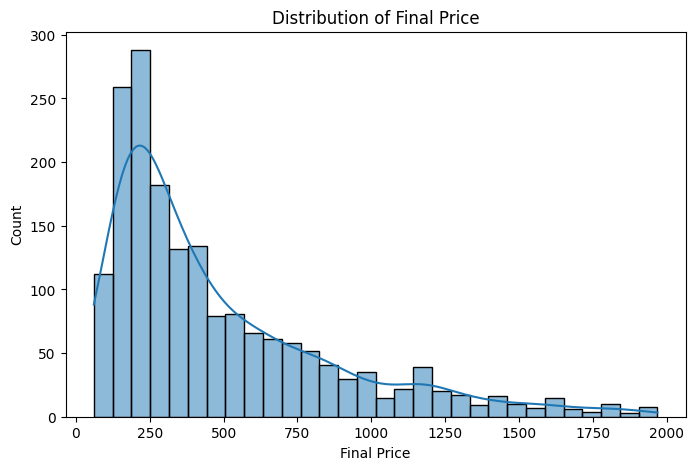

In [177]:
# ÿßŸÑÿ¨ÿ≤ÿ° 8: ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ≥ÿπÿ± ÿßŸÑŸÜŸáÿßÿ¶Ÿä
plt.figure(figsize=(8,5))
sns.histplot(df['Final Price'], bins=30, kde=True)
plt.title("Distribution of Final Price")
plt.xlabel("Final Price")
plt.ylabel("Count")
plt.show()

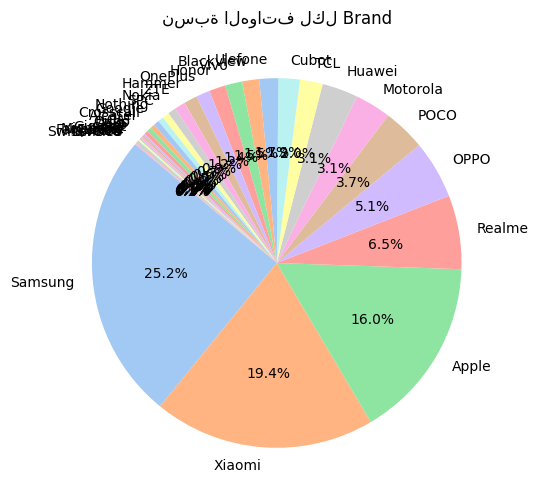

In [178]:
# -------------------------------
# Pie Chart ‚Äì ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸáŸàÿßÿ™ŸÅ ŸÑŸÉŸÑ Brand
# -------------------------------
brand_counts = df_filtered['Brand'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸáŸàÿßÿ™ŸÅ ŸÑŸÉŸÑ Brand')
plt.show()


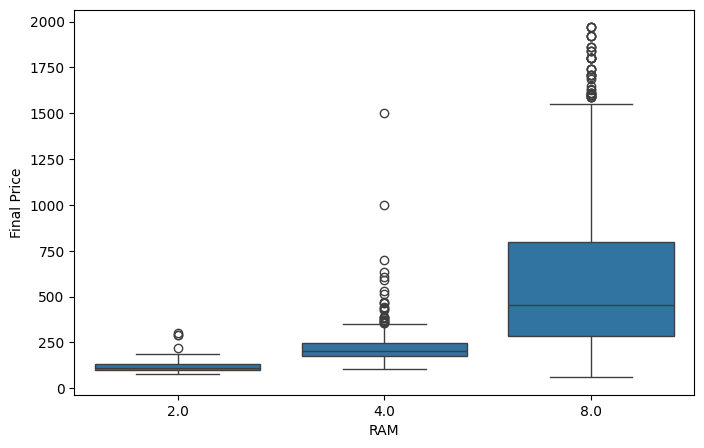

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(x='RAM', y='Final Price', data=df_filtered)
plt.show()

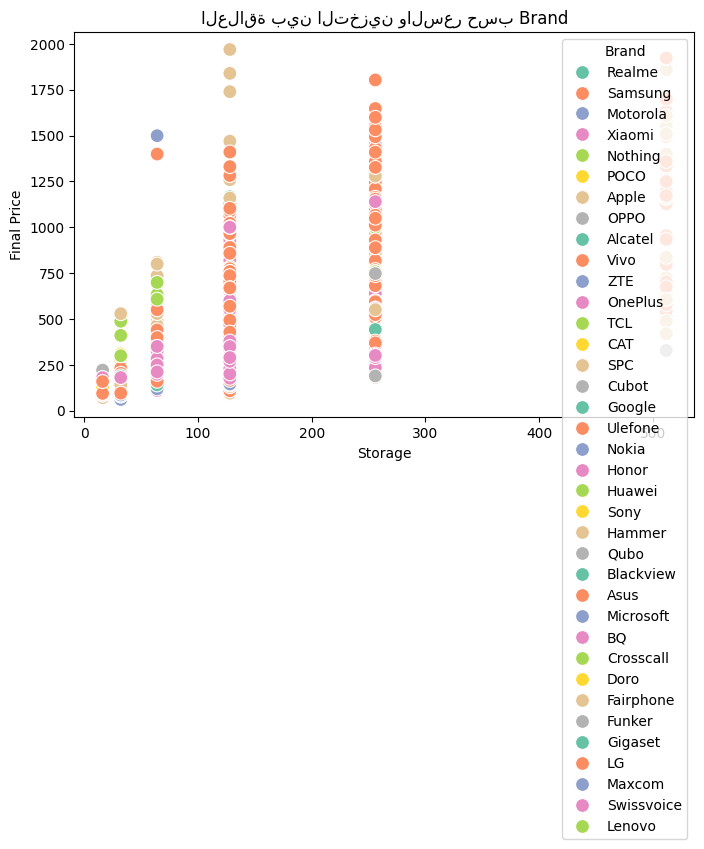

In [180]:
# -------------------------------
# Scatter Plot ‚Äì ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ Storage ŸàFinal Price
# -------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x='Storage', y='Final Price', hue='Brand', data=df_filtered, palette='Set2', s=100)
plt.title('ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑÿ™ÿÆÿ≤ŸäŸÜ ŸàÿßŸÑÿ≥ÿπÿ± ÿ≠ÿ≥ÿ® Brand')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6548\2507829037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Final Price', data=df_filtered, palette='coolwarm')


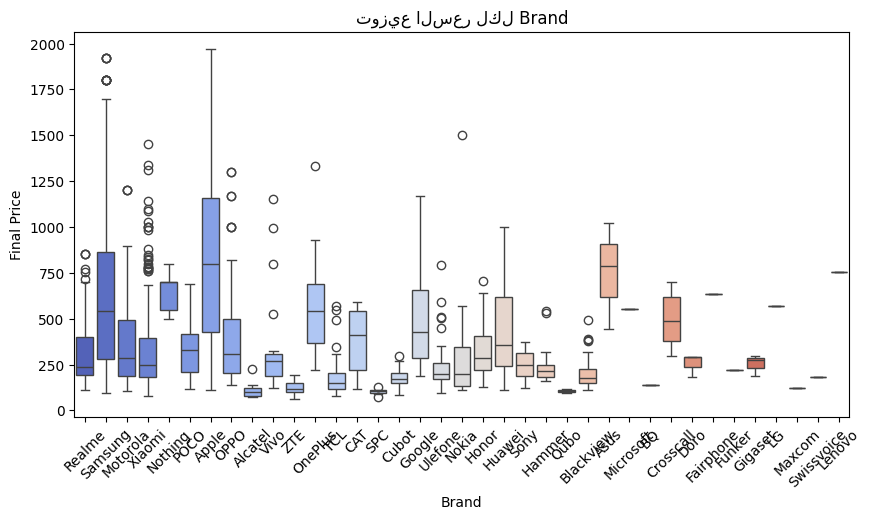

In [181]:
# -------------------------------
#Box Plot ‚Äì ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ≥ÿπÿ± ŸÑŸÉŸÑ Brand
# -------------------------------
plt.figure(figsize=(10,5))
sns.boxplot(x='Brand', y='Final Price', data=df_filtered, palette='coolwarm')
plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ≥ÿπÿ± ŸÑŸÉŸÑ Brand')
plt.xticks(rotation=45)
plt.show()


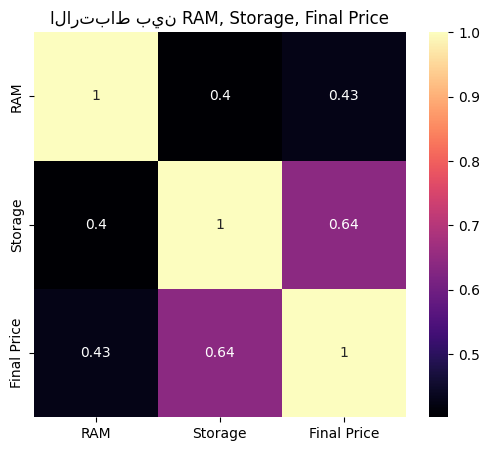

In [182]:
# -------------------------------
# Heatmap ‚Äì ÿßŸÑÿßÿ±ÿ™ÿ®ÿßÿ∑ ÿ®ŸäŸÜ ÿßŸÑÿÆÿµÿßÿ¶ÿµ ÿßŸÑÿ±ŸÇŸÖŸäÿ©
# -------------------------------
plt.figure(figsize=(6,5))
sns.heatmap(df_filtered[['RAM','Storage','Final Price']].corr(), annot=True, cmap='magma')
plt.title('ÿßŸÑÿßÿ±ÿ™ÿ®ÿßÿ∑ ÿ®ŸäŸÜ RAM, Storage, Final Price')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6548\1593229718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Storage', data=df_filtered, palette='Set3', order=df_filtered['Storage'].value_counts().index)


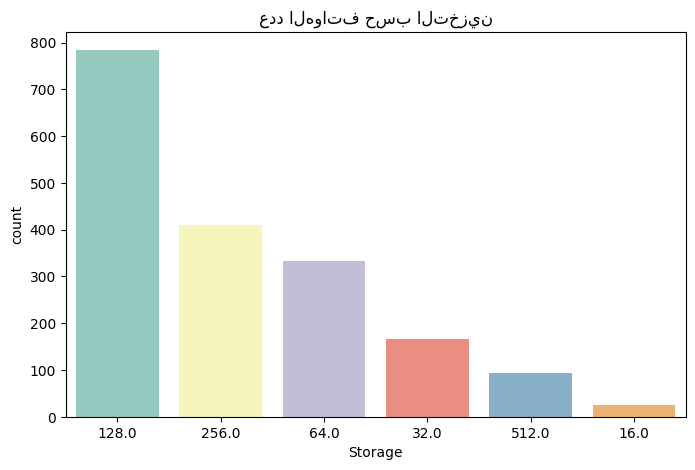

In [183]:
# -------------------------------
# 7Ô∏è‚É£ Count Plot ‚Äì ÿπÿØÿØ ÿßŸÑŸáŸàÿßÿ™ŸÅ ÿ≠ÿ≥ÿ® Storage
# -------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='Storage', data=df_filtered, palette='Set3', order=df_filtered['Storage'].value_counts().index)
plt.title('ÿπÿØÿØ ÿßŸÑŸáŸàÿßÿ™ŸÅ ÿ≠ÿ≥ÿ® ÿßŸÑÿ™ÿÆÿ≤ŸäŸÜ')
plt.show()

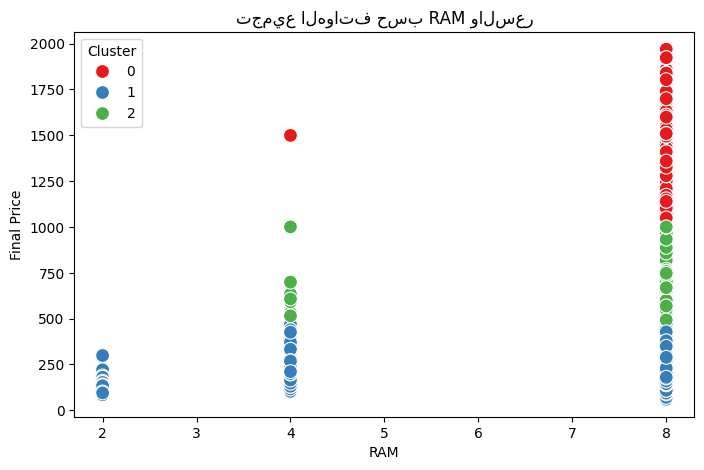

In [184]:
#ŸÖŸÉÿ±ÿ±
# -------------------------------
# 8Ô∏è‚É£ Cluster Scatter ‚Äì ÿ™ÿ¨ŸÖŸäÿπ ÿ≠ÿ≥ÿ® RAM ŸàFinal Price
# -------------------------------
X_cluster = df_filtered[['RAM','Final Price']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_cluster)
df_filtered['Cluster'] = kmeans.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(x='RAM', y='Final Price', hue='Cluster', data=df_filtered, palette='Set1', s=100)
plt.title('ÿ™ÿ¨ŸÖŸäÿπ ÿßŸÑŸáŸàÿßÿ™ŸÅ ÿ≠ÿ≥ÿ® RAM ŸàÿßŸÑÿ≥ÿπÿ±')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6548\2026660657.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Brand', y='Final Price', hue='Storage', data=df_filtered, ci=None, palette='Paired')


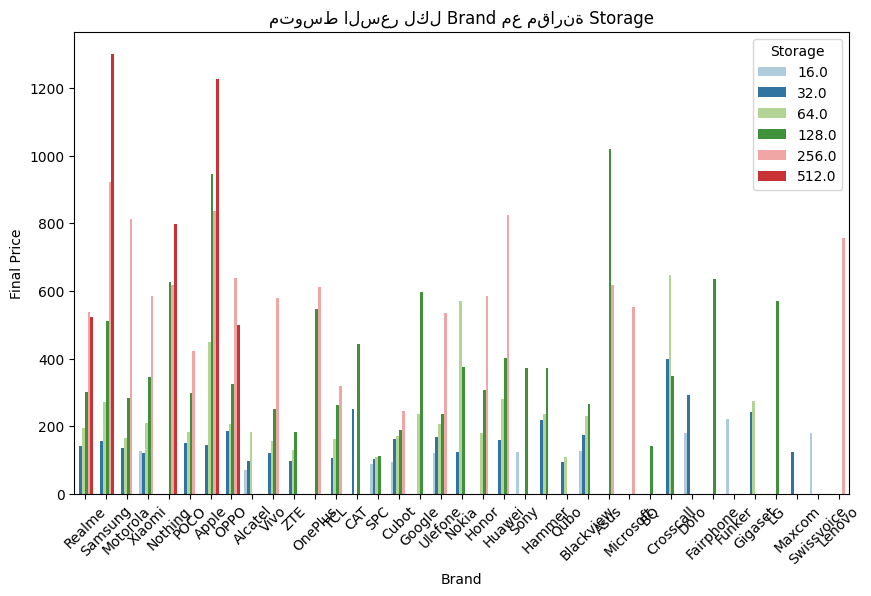

In [185]:
# -------------------------------
# 9Ô∏è‚É£ Bar Comparison ‚Äì ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ŸÑŸÉŸÑ Brand ŸàStorage
# -------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='Brand', y='Final Price', hue='Storage', data=df_filtered, ci=None, palette='Paired')
plt.title('ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ŸÑŸÉŸÑ Brand ŸÖÿπ ŸÖŸÇÿßÿ±ŸÜÿ© Storage')
plt.xticks(rotation=45)
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

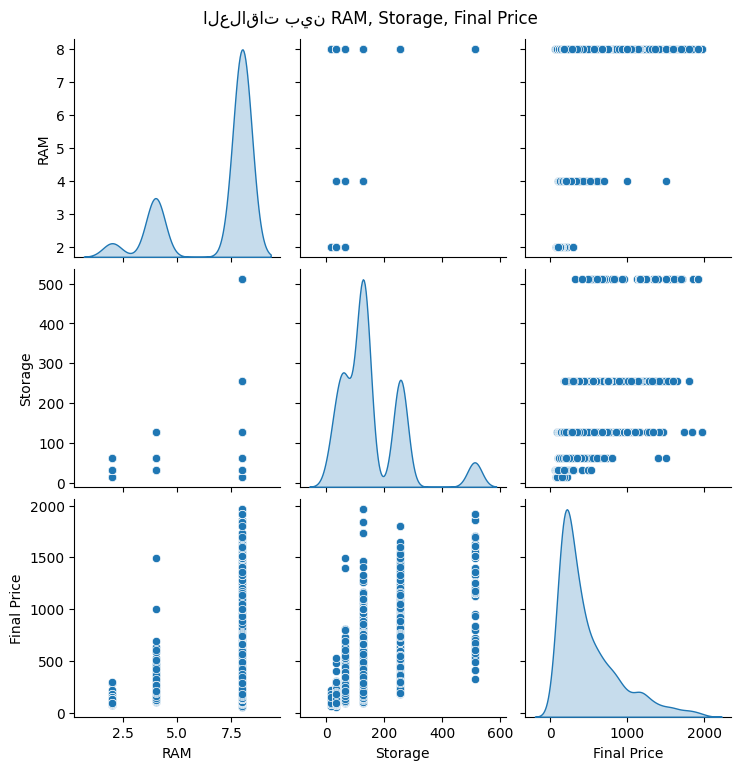

In [186]:
# -------------------------------
# üîü Pairplot ‚Äì ÿπŸÑÿßŸÇÿ© ÿ¨ŸÖŸäÿπ ÿßŸÑŸÖÿ™ÿ∫Ÿäÿ±ÿßÿ™ ÿßŸÑÿ±ŸÇŸÖŸäÿ©
# -------------------------------
sns.pairplot(df_filtered[['RAM','Storage','Final Price']], kind='scatter', diag_kind='kde', palette='Set2')
plt.suptitle('ÿßŸÑÿπŸÑÿßŸÇÿßÿ™ ÿ®ŸäŸÜ RAM, Storage, Final Price', y=1.02)
plt.show()

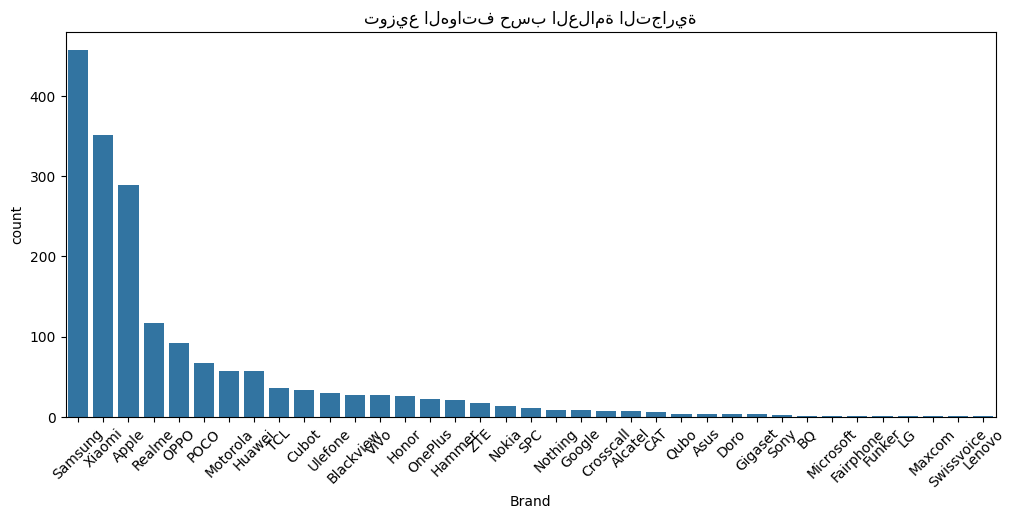

In [187]:

# Descriptive ‚Äì ŸàÿµŸÅŸäÿ© (ŸÖÿßÿ∞ÿß ÿ≠ÿØÿ´ÿü)

# ÿßŸÑŸáÿØŸÅ: ŸÅŸáŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸàŸàÿµŸÅŸáÿß
# ŸÖÿ´ÿßŸÑ ÿπŸÖŸÑŸä: ÿ™Ÿàÿ≤Ÿäÿπ ÿπÿØÿØ ÿßŸÑŸáŸàÿßÿ™ŸÅ ŸÑŸÉŸÑ Brand ÿ£Ÿà ŸÖŸàÿØŸäŸÑ
plt.figure(figsize=(12,5))
# ÿ™Ÿàÿ≤Ÿäÿπ ÿπÿØÿØ ÿßŸÑŸáŸàÿßÿ™ŸÅ ŸÑŸÉŸÑ Brand
sns.countplot(data=df_filtered, x='Brand', order=df_filtered['Brand'].value_counts().index)
plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸáŸàÿßÿ™ŸÅ ÿ≠ÿ≥ÿ® ÿßŸÑÿπŸÑÿßŸÖÿ© ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©')
plt.xticks(rotation=45)
plt.show()


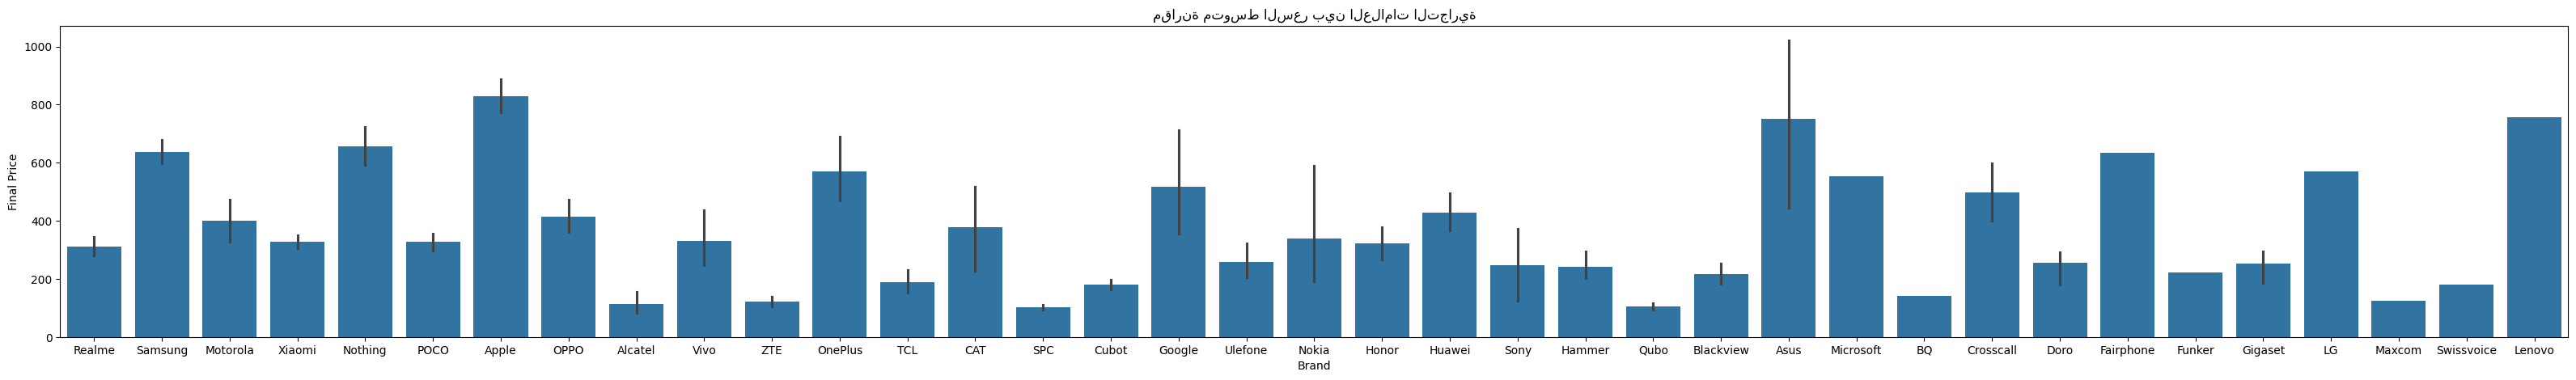

In [188]:
#  Comparative ‚Äì ŸÖŸÇÿßÿ±ŸÜÿ© (ÿ£ŸäŸáŸÖÿß ÿ£ŸÅÿ∂ŸÑ ÿ£Ÿà ÿ£ÿ≥Ÿàÿ£ÿü)

# ÿßŸÑŸáÿØŸÅ: ŸÖŸÇÿßÿ±ŸÜÿ© ŸÖÿ¨ŸÖŸàÿπÿßÿ™ ÿ£Ÿà ŸÅÿ™ÿ±ÿßÿ™
# ŸÖÿ´ÿßŸÑ ÿπŸÖŸÑŸä: ŸÖŸÇÿßÿ±ŸÜÿ© ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ŸÑŸÉŸÑ Brand
plt.figure(figsize=(40,5))
sns.barplot(x='Brand', y='Final Price', data=df_filtered)
plt.title('ŸÖŸÇÿßÿ±ŸÜÿ© ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ÿ®ŸäŸÜ ÿßŸÑÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©')
plt.show()

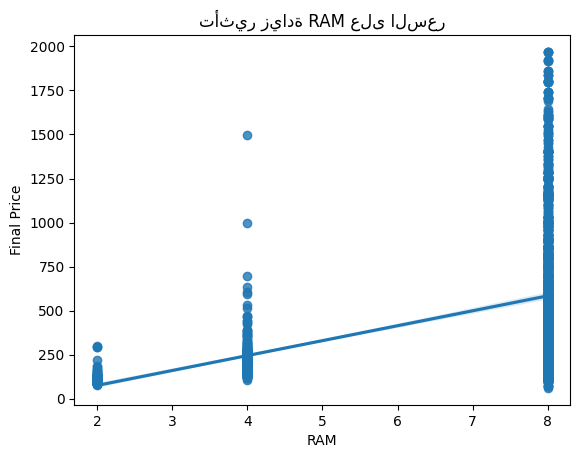

In [189]:
sns.regplot(x='RAM', y='Final Price', data=df_filtered)
plt.title('ÿ™ÿ£ÿ´Ÿäÿ± ÿ≤ŸäÿßÿØÿ© RAM ÿπŸÑŸâ ÿßŸÑÿ≥ÿπÿ±')
plt.show()

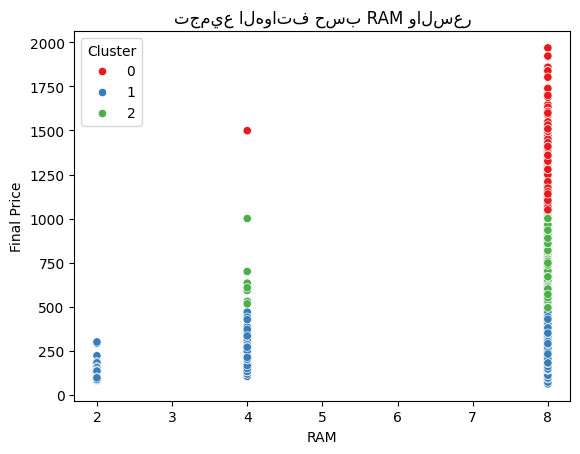

In [190]:
# 8Ô∏è‚É£ Clusters ‚Äì ÿßŸÑÿ™ÿ¨ŸÖŸäÿπ

# ÿßŸÑŸáÿØŸÅ: ÿ™ÿ¨ŸÖŸäÿπ ÿßŸÑŸáŸàÿßÿ™ŸÅ ÿ≠ÿ≥ÿ® ÿßŸÑÿÆÿµÿßÿ¶ÿµ

from sklearn.cluster import KMeans
X_cluster = df_filtered[['RAM','Storage','Final Price']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_cluster)
df_filtered['Cluster'] = kmeans.labels_

sns.scatterplot(x='RAM', y='Final Price', hue='Cluster', data=df_filtered, palette='Set1')
plt.title('ÿ™ÿ¨ŸÖŸäÿπ ÿßŸÑŸáŸàÿßÿ™ŸÅ ÿ≠ÿ≥ÿ® RAM ŸàÿßŸÑÿ≥ÿπÿ±')
plt.show()

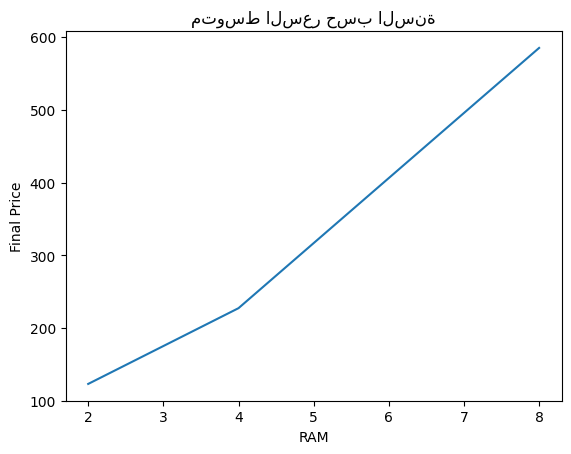

In [191]:
# 9Ô∏è‚É£ Temporal / Trend ‚Äì ÿ≤ŸÖŸÜŸäÿ©

# ÿßŸÑŸáÿØŸÅ: ÿ™ÿ™ÿ®ÿπ ÿßŸÑÿ™ÿ∫Ÿäÿ±ÿßÿ™ ÿπŸÑŸâ ÿßŸÑÿ≤ŸÖŸÜ
# ŸÖÿ´ÿßŸÑ ÿπŸÖŸÑŸä: ŸÑŸà ÿπŸÜÿØŸÉ ÿ®ŸäÿßŸÜÿßÿ™ ÿ≥ŸÜÿ© ÿßŸÑÿ•ÿµÿØÿßÿ± ÿ£Ÿà ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ®Ÿäÿπ

sns.lineplot(x='RAM', y='Final Price', data=df_filtered.groupby('RAM')['Final Price'].mean().reset_index())
plt.title('ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ÿ≠ÿ≥ÿ® ÿßŸÑÿ≥ŸÜÿ©')
plt.show()

ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿßŸÑÿ±ÿßŸÖ:
 RAM
8.0    1343
4.0     380
2.0      88
Name: count, dtype: int64


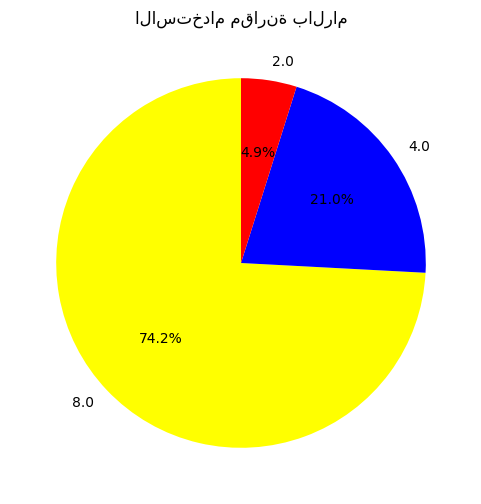

In [192]:
gender_count = df["RAM"].value_counts()
print("ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿßŸÑÿ±ÿßŸÖ:\n", gender_count)

plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=["yellow", "blue","red"], startangle=90)
plt.title("ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿßŸÑÿ±ÿßŸÖ")
plt.show()

In [193]:
df.drop(columns=["Model"], inplace=True, errors='ignore')
df.drop(columns=["Brand"], inplace=True, errors='ignore')


In [194]:
# ÿßŸÑÿ¨ÿ≤ÿ° 10: ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©
df.to_csv("smartphones_processedŸÇÿ®ŸÑ ÿßŸÑÿ™ÿ±ŸÇŸäŸÖ ÿ¨ÿØŸäÿØ.csv", index=False)
print("ÿ™ŸÖ ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿ®ÿßÿ≥ŸÖ: smartphones_processed.csv")

ÿ™ŸÖ ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿ®ÿßÿ≥ŸÖ: smartphones_processed.csv


# ÿßŸÑÿ™ÿØÿ±Ÿäÿ® 

In [195]:
print(df.dtypes)

Smartphone      object
RAM            float64
Storage        float64
Free             int64
Final Price    float64
dtype: object


In [196]:
from sklearn.preprocessing import LabelEncoder

# le_brand = LabelEncoder()
# df['Brand'] = le_brand.fit_transform(df['Brand'])

le_smartphone = LabelEncoder()
df['Smartphone'] = le_smartphone.fit_transform(df['Smartphone'])

# le_model = LabelEncoder()
# df['Model'] = le_model.fit_transform(df['Model'])

# ŸÑŸà ÿπŸÖŸàÿØ Free ŸÜÿµŸä
le_free = LabelEncoder()
df['Free'] = le_free.fit_transform(df['Free'])


In [197]:
print(df.dtypes)

Smartphone       int64
RAM            float64
Storage        float64
Free             int64
Final Price    float64
dtype: object


In [198]:
# X: ÿ¨ŸÖŸäÿπ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÖÿßÿπÿØÿß PriceCategory
X = df.drop(['Final Price'], axis=1)

# y: ÿßŸÑŸÅÿ¶ÿ©
y = df['Final Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# -------------------------------
#  ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# -------------------------------

# ÿ•ŸÜÿ¥ÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßŸÑÿ≥ÿπÿ± ŸÉÿ±ŸÇŸÖ
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
rf.fit(X_train, y_train)
# -------------------------------
#  ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# -------------------------------
y_pred = rf.predict(X_test)

# -------------------------------
# ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ© ŸÉŸÜÿ≥ÿ®ÿ© ŸÖÿ¶ŸàŸäÿ©
# -------------------------------
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R¬≤: {r2*100:.2f}%")

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse*100:.2f}%")


r2 = r2_score(y_test, y_pred)
print(f"R¬≤: {r2*100:.2f}%")


R¬≤: 83.28%
RMSE: 16768.11%
R¬≤: 83.28%


In [199]:
# ÿ™ŸÇÿ≥ŸäŸÖ Final Price ÿ•ŸÑŸâ ÿ´ŸÑÿßÿ´ ŸÅÿ¶ÿßÿ™
bins = [50, 500, 1000, df['Final Price'].max()]  # ŸÖÿ´ÿßŸÑ ÿπŸÑŸâ ÿ≠ÿØŸàÿØ ÿßŸÑŸÅÿ¶ÿßÿ™
labels = ['ÿ±ÿÆŸäÿµ', 'ŸÖÿ™Ÿàÿ≥ÿ∑', 'ÿ∫ÿßŸÑŸä']

df['PriceCategory'] = pd.cut(df['Final Price'], bins=bins, labels=labels, include_lowest=True)


# ÿπÿ±ÿ∂ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ŸÑŸÑÿ™ÿ£ŸÉÿØ
df[['Final Price', 'PriceCategory']].head(10)

Final Price PriceCategory
0       231.60          ÿ±ÿÆŸäÿµ
1       279.00          ÿ±ÿÆŸäÿµ
2       179.01          ÿ±ÿÆŸäÿµ
3       279.99          ÿ±ÿÆŸäÿµ
4       799.00         ŸÖÿ™Ÿàÿ≥ÿ∑
5       148.52          ÿ±ÿÆŸäÿµ
6       699.00         ŸÖÿ™Ÿàÿ≥ÿ∑
7       352.59          ÿ±ÿÆŸäÿµ
8       279.00          ÿ±ÿÆŸäÿµ
9       329.99          ÿ±ÿÆŸäÿµ

In [200]:
# X: ÿ¨ŸÖŸäÿπ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÖÿßÿπÿØÿß PriceCategory
X = df.drop(['PriceCategory', 'Final Price'], axis=1)

# y: ÿßŸÑŸÅÿ¶ÿ©
y = df['PriceCategory']


In [201]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [202]:
# -------------------------------
#  ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# -------------------------------

rf = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42 )
rf.fit(X_train, y_train)

# -------------------------------
#  ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# -------------------------------
y_pred = rf.predict(X_test)

# -------------------------------
# ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ© ŸÉŸÜÿ≥ÿ®ÿ© ŸÖÿ¶ŸàŸäÿ©
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"ÿßŸÑÿØŸÇÿ©: {accuracy*100:.2f}%")

ÿßŸÑÿØŸÇÿ©: 87.88%


In [203]:
# 3Ô∏è‚É£ ÿπÿØÿØ ÿßŸÑÿ£ÿ¥ÿ¨ÿßÿ±
print("ÿπÿØÿØ ÿßŸÑÿ£ÿ¥ÿ¨ÿßÿ± ŸÅŸä ÿßŸÑÿ∫ÿßÿ®ÿ©:", len(rf.estimators_))

# 4Ô∏è‚É£ ÿ≠ÿ≥ÿßÿ® ÿ£ÿπŸÖÿßŸÇ ŸÉŸÑ ÿ¥ÿ¨ÿ±ÿ©
tree_depths = [estimator.tree_.max_depth for estimator in rf.estimators_]

print("ÿ£ÿπŸÖÿßŸÇ ÿßŸÑÿ£ÿ¥ÿ¨ÿßÿ±:", tree_depths)
print("ÿ£ŸÉÿ®ÿ± ÿπŸÖŸÇ:", max(tree_depths))
print("ÿ£ÿµÿ∫ÿ± ÿπŸÖŸÇ:", min(tree_depths))
print("ÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑:", sum(tree_depths) / len(tree_depths))

ÿπÿØÿØ ÿßŸÑÿ£ÿ¥ÿ¨ÿßÿ± ŸÅŸä ÿßŸÑÿ∫ÿßÿ®ÿ©: 100
ÿ£ÿπŸÖÿßŸÇ ÿßŸÑÿ£ÿ¥ÿ¨ÿßÿ±: [23, 19, 21, 24, 20, 18, 22, 18, 22, 21, 29, 20, 21, 17, 21, 19, 19, 24, 18, 19, 20, 19, 19, 26, 19, 19, 23, 20, 21, 19, 20, 17, 21, 19, 22, 22, 20, 21, 18, 18, 25, 18, 17, 20, 18, 21, 19, 18, 18, 19, 19, 19, 20, 20, 21, 22, 24, 18, 18, 19, 18, 18, 22, 23, 20, 19, 19, 17, 22, 21, 17, 17, 22, 19, 21, 20, 18, 20, 20, 20, 23, 21, 19, 17, 19, 25, 21, 18, 19, 20, 17, 21, 18, 21, 20, 21, 20, 19, 22, 19]
ÿ£ŸÉÿ®ÿ± ÿπŸÖŸÇ: 29
ÿ£ÿµÿ∫ÿ± ÿπŸÖŸÇ: 17
ÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑: 20.04


In [204]:
importances = rf.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")

# Ÿáÿ∞Ÿá ÿßŸÑÿÆÿ∑Ÿàÿ© ÿ™ÿ®ŸäŸÜ ŸÑŸÉ ÿ£Ÿä ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿ£ŸÉÿ´ÿ± ÿ™ÿ£ÿ´Ÿäÿ± ÿπŸÑŸâ ÿ≥ÿπÿ± ÿßŸÑŸáÿßÿ™ŸÅ.

Smartphone: 0.74
RAM: 0.09
Storage: 0.16
Free: 0.01


In [205]:
# ÿßŸÑÿ¨ÿ≤ÿ° 10: ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©
df.to_csv("smartphones_processedÿ¨ÿØŸäÿØ.csv", index=False)
print("ÿ™ŸÖ ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿ®ÿßÿ≥ŸÖ: smartphones_processed.csv")

ÿ™ŸÖ ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿ®ÿßÿ≥ŸÖ: smartphones_processed.csv


In [206]:
# pip install category_encoders


In [207]:
# # -*- coding: utf-8 -*-
# # ŸÖÿ¥ÿ±Ÿàÿπ ÿ™ŸÜŸÇŸäÿ® ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ‚Äì ÿßŸÑŸáŸàÿßÿ™ŸÅ ÿßŸÑÿ∞ŸÉŸäÿ©

# # 1Ô∏è‚É£ ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from category_encoders import TargetEncoder
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.cluster import KMeans

# # -------------------------------
# # 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# # -------------------------------
# df = pd.read_csv("smartphones.csv")

# # -------------------------------
# # 3Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# # -------------------------------
# # ÿ≠ÿ∞ŸÅ ÿßŸÑŸÑŸàŸÜ ŸÑÿ£ŸÜŸá ÿ∫Ÿäÿ± ŸÖŸáŸÖ ÿ∫ÿßŸÑÿ®ÿßŸã
# df.drop(columns=['Color'], inplace=True, errors='ignore')

# # ÿßŸÑÿßÿ≠ÿ™ŸÅÿßÿ∏ ÿ®ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ∑ÿ®ŸäÿπŸäÿ© ŸÑŸÑŸÄ RAM
# allowed_ram = [2, 4, 8, 16, 32]
# most_common_ram = df.loc[df['RAM'].isin(allowed_ram), 'RAM'].mode()[0]
# df['RAM'] = df['RAM'].apply(lambda x: x if x in allowed_ram else most_common_ram)

# # ÿßŸÑÿßÿ≠ÿ™ŸÅÿßÿ∏ ÿ®ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ∑ÿ®ŸäÿπŸäÿ© ŸÑŸÑÿ™ÿÆÿ≤ŸäŸÜ
# allowed_storage = [16, 32, 64, 128, 256, 512, 1024]
# most_common_storage = df.loc[df['Storage'].isin(allowed_storage), 'Storage'].mode()[0]
# df['Storage'] = df['Storage'].apply(lambda x: x if x in allowed_storage else most_common_storage)

# # ÿßŸÑÿßÿ≠ÿ™ŸÅÿßÿ∏ ŸÅŸÇÿ∑ ÿ®ÿßŸÑÿ£ÿ≥ÿπÿßÿ± ÿßŸÑÿ∑ÿ®ŸäÿπŸäÿ©
# df = df[(df['Final Price'] >= 50) & (df['Final Price'] <= 2000)]

# # ÿ≠ÿ∞ŸÅ ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑŸÖŸÉÿ±ÿ±ÿ©
# df = df.drop_duplicates()

# # -------------------------------
# # 4Ô∏è‚É£ ÿßÿ≥ÿ™ŸÉÿ¥ÿßŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# # -------------------------------
# # ÿ™Ÿàÿ≤Ÿäÿπ ÿπÿØÿØ ÿßŸÑŸáŸàÿßÿ™ŸÅ ŸÑŸÉŸÑ Brand
# plt.figure(figsize=(12,5))
# sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index)
# plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸáŸàÿßÿ™ŸÅ ÿ≠ÿ≥ÿ® ÿßŸÑÿπŸÑÿßŸÖÿ© ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©')
# plt.xticks(rotation=45)
# plt.show()

# # Boxplot ŸÑŸÑÿ≥ÿπÿ± ÿ≠ÿ≥ÿ® RAM
# plt.figure(figsize=(8,5))
# sns.boxplot(x='RAM', y='Final Price', data=df)
# plt.title("ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ≥ÿπÿ± ÿ≠ÿ≥ÿ® RAM")
# plt.show()

# # Scatter Plot ÿ®ŸäŸÜ Storage Ÿà Final Price ÿ≠ÿ≥ÿ® Brand
# plt.figure(figsize=(8,5))
# sns.scatterplot(x='Storage', y='Final Price', hue='Brand', data=df, palette='Set2', s=100)
# plt.title('ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑÿ™ÿÆÿ≤ŸäŸÜ ŸàÿßŸÑÿ≥ÿπÿ± ÿ≠ÿ≥ÿ® Brand')
# plt.show()

# # Heatmap ŸÑŸÑÿßÿ±ÿ™ÿ®ÿßÿ∑ ÿ®ŸäŸÜ ÿßŸÑÿÆÿµÿßÿ¶ÿµ ÿßŸÑÿ±ŸÇŸÖŸäÿ©
# plt.figure(figsize=(6,5))
# sns.heatmap(df[['RAM','Storage','Final Price']].corr(), annot=True, cmap='magma')
# plt.title('ÿßŸÑÿßÿ±ÿ™ÿ®ÿßÿ∑ ÿ®ŸäŸÜ RAM, Storage, Final Price')
# plt.show()

# # -------------------------------
# # 5Ô∏è‚É£ Feature Engineering
# # -------------------------------
# # Feature Interaction: RAM * Storage
# df['RAM_Storage'] = df['RAM'] * df['Storage']

# # Target Encoding ŸÑŸÑŸÄ Smartphone
# target_enc = TargetEncoder(cols=['Smartphone'])
# df['Smartphone_TE'] = target_enc.fit_transform(df['Smartphone'], df['Final Price'])

# # ÿ™ÿ±ŸÖŸäÿ≤ Free
# le_free = LabelEncoder()
# df['Free'] = le_free.fit_transform(df['Free'])

# # -------------------------------
# # 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ Final Price ÿ•ŸÑŸâ ŸÅÿ¶ÿßÿ™
# # -------------------------------
# bins = [50, 500, 1000, df['Final Price'].max()]
# labels = ['ÿ±ÿÆŸäÿµ', 'ŸÖÿ™Ÿàÿ≥ÿ∑', 'ÿ∫ÿßŸÑŸä']
# df['PriceCategory'] = pd.cut(df['Final Price'], bins=bins, labels=labels, include_lowest=True)

# # -------------------------------
# # 7Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ X Ÿà y
# # -------------------------------
# X = df[['Smartphone_TE','RAM','Storage','RAM_Storage','Free']]
# y = df['PriceCategory']

# # ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # -------------------------------
# # 8Ô∏è‚É£ ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ Gradient Boosting
# # -------------------------------
# gb = GradientBoostingClassifier(
#     n_estimators=300,
#     learning_rate=0.05,
#     max_depth=4,
#     random_state=42
# )
# gb.fit(X_train, y_train)

# # ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# y_pred = gb.predict(X_test)

# # -------------------------------
# # 9Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"ÿßŸÑÿØŸÇÿ©: {accuracy*100:.2f}%")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.title("Confusion Matrix")
# plt.ylabel("ÿßŸÑÿ≠ŸÇŸäŸÇÿ©")
# plt.xlabel("ÿßŸÑÿ™ŸÜÿ®ÿ§")
# plt.show()

# # -------------------------------
# # 10Ô∏è‚É£ ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©
# # -------------------------------
# df.to_csv("smartphones_processed_final.csv", index=False)
# print("ÿ™ŸÖ ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿ®ÿßÿ≥ŸÖ: smartphones_processed_final.csv")


In [208]:
# # ÿßŸÑÿ¨ÿ≤ÿ° 10: ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©
# df.to_csv("smartphones_processedÿ¨ÿØŸäÿØ.csv", index=False)
# print("ÿ™ŸÖ ÿ≠ŸÅÿ∏ ŸÜÿ≥ÿÆÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿ®ÿßÿ≥ŸÖ: smartphones_processed.csv")

In [209]:
# clf = DecisionTreeClassifier (class_weight='balanced', random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print(classification_report(y_test, y_pred))

# accuracy = accuracy_score(y_test, y_pred)
# print(f"ÿßŸÑÿØŸÇÿ©: {accuracy*100:.2f}%")


In [210]:
# # -------------------------------
# # 1Ô∏è‚É£ ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ Logistic Regression
# # -------------------------------
# logreg = LogisticRegression( class_weight='balanced',max_iter=1000, random_state=42)
# logreg.fit(X_train, y_train)


# # -------------------------------
# # 2Ô∏è‚É£ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# # -------------------------------
# y_pred = logreg.predict(X_test)

# # -------------------------------
# # 3Ô∏è‚É£ ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ© ŸÉŸÜÿ≥ÿ®ÿ© ŸÖÿ¶ŸàŸäÿ©
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"ÿßŸÑÿØŸÇÿ©: {accuracy*100:.2f}%")


In [211]:
# # -------------------------------
# # 1Ô∏è‚É£ ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ KNN
# # -------------------------------
# knn = KNeighborsClassifier(n_neighbors=5)  # ŸäŸÖŸÉŸÜŸÉ ÿ™ÿπÿØŸäŸÑ ÿπÿØÿØ ÿßŸÑÿ¨Ÿäÿ±ÿßŸÜ
# knn.fit(X_train, y_train)

# # -------------------------------
# # 2Ô∏è‚É£ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# # -------------------------------
# y_pred = knn.predict(X_test)

# # -------------------------------
# # 3Ô∏è‚É£ ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ© ŸÉŸÜÿ≥ÿ®ÿ© ŸÖÿ¶ŸàŸäÿ©
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"ÿßŸÑÿØŸÇÿ©: {accuracy*100:.2f}%")


In [212]:

# # -------------------------------
# # ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ SVM
# # -------------------------------
# svm_model = SVC(kernel='linear', random_state=42)  # kernel ŸäŸÖŸÉŸÜ ÿ™ÿ∫ŸäŸäÿ±Ÿá ÿ•ŸÑŸâ 'rbf' ÿ≠ÿ≥ÿ® ÿßŸÑÿ≠ÿßÿ¨ÿ©
# svm_model.fit(X_train, y_train)

# # -------------------------------
# # ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# # -------------------------------
# y_pred_svm = svm_model.predict(X_test)

# # -------------------------------
# # ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ© ŸÉŸÜÿ≥ÿ®ÿ© ŸÖÿ¶ŸàŸäÿ©
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred_svm)
# print(f"ÿßŸÑÿØŸÇÿ© (SVM): {accuracy*100:.2f}%")


In [213]:
# # ÿßŸÅÿ™ÿ±ÿ∂ ÿ£ŸÜ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ÿßŸÑÿ≥ÿßÿ®ŸÇÿ© ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ®Ÿáÿß: dtree, logreg, rf, knn, svm_model
# # ÿßŸÑÿ™ŸÜÿ®ÿ§ ŸÑŸÉŸÑ ŸÜŸÖŸàÿ∞ÿ¨
# models = {
#     'Decision Tree': clf,
#     'Logistic Regression': logreg,
#     'Random Forest': rf,
#     'KNN': knn,
#     'SVM': svm_model
# }

# results = []

# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     accuracy = accuracy_score(y_test, y_pred)
#     results.append({
#         'Model': name,
#         'Accuracy': accuracy*100,
#         'Precision': report['weighted avg']['precision'],
#         'Recall': report['weighted avg']['recall'],
#         'F1-score': report['weighted avg']['f1-score']
#     })

# # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ÿ•ŸÑŸâ DataFrame
# results_df = pd.DataFrame(results)
# print(results_df)

# # ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ŸÑŸÖŸÇÿßÿ±ŸÜÿ© Accuracy
# plt.figure(figsize=(8,5))
# sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Set2')
# plt.title("ŸÖŸÇÿßÿ±ŸÜÿ© ÿßŸÑÿØŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨")
# plt.ylabel("Accuracy (%)")
# plt.ylim(0, 100)
# plt.show()


In [214]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [215]:
# # -------------------------------
# # 1Ô∏è‚É£ ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ Logistic Regression
# # -------------------------------
# logreg = LogisticRegression( class_weight='balanced',max_iter=1000, random_state=42)
# logreg.fit(X_train, y_train)


# # -------------------------------
# # 2Ô∏è‚É£ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# # -------------------------------
# y_pred = logreg.predict(X_test)

# # -------------------------------
# # 3Ô∏è‚É£ ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ© ŸÉŸÜÿ≥ÿ®ÿ© ŸÖÿ¶ŸàŸäÿ©
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"ÿßŸÑÿØŸÇÿ©: {accuracy*100:.2f}%")

# # -------------------------------
# # 4Ô∏è‚É£ ÿ•ŸÜÿ¥ÿßÿ° ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥
# # -------------------------------
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix (ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥):\n", cm)

# # -------------------------------
# # 5Ô∏è‚É£ ÿ±ÿ≥ŸÖ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥
# # -------------------------------
# plt.figure(figsize=(6,4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - Logistic Regression")
# plt.show()

# # -------------------------------
# # 6Ô∏è‚É£ ÿ™ŸÇÿ±Ÿäÿ± ÿßŸÑÿ™ÿµŸÜŸäŸÅ ŸÑŸÉŸÑ ŸÅÿ¶ÿ©
# # -------------------------------
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [216]:

# # -------------------------------
# # 1Ô∏è‚É£ ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# # -------------------------------
# rf = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # -------------------------------
# # 2Ô∏è‚É£ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# # -------------------------------
# y_pred = rf.predict(X_test)

# # -------------------------------
# # 3Ô∏è‚É£ ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ© ŸÉŸÜÿ≥ÿ®ÿ© ŸÖÿ¶ŸàŸäÿ©
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"ÿßŸÑÿØŸÇÿ©: {accuracy*100:.2f}%")

# # -------------------------------
# # 4Ô∏è‚É£ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥
# # -------------------------------
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - Random Forest")
# plt.show()

# # -------------------------------
# # 5Ô∏è‚É£ ÿ™ŸÇÿ±Ÿäÿ± ÿßŸÑÿ™ÿµŸÜŸäŸÅ ŸÑŸÉŸÑ ŸÅÿ¶ÿ©
# # -------------------------------
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # -------------------------------
# # 6Ô∏è‚É£ ÿ£ŸáŸÖŸäÿ© ÿßŸÑÿÆÿµÿßÿ¶ÿµ (Feature Importance)
# # -------------------------------
# feature_importances = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': rf.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print("\nFeature Importance:\n", feature_importances)

# # ÿ±ÿ≥ŸÖ ÿ£ŸáŸÖŸäÿ© ÿßŸÑÿÆÿµÿßÿ¶ÿµ
# plt.figure(figsize=(8,6))
# sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
# plt.title("Feature Importance - Random Forest")
# plt.show()


In [217]:
# # -------------------------------
# # 1Ô∏è‚É£ ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ KNN
# # -------------------------------
# knn = KNeighborsClassifier(n_neighbors=5)  # ŸäŸÖŸÉŸÜŸÉ ÿ™ÿπÿØŸäŸÑ ÿπÿØÿØ ÿßŸÑÿ¨Ÿäÿ±ÿßŸÜ
# knn.fit(X_train, y_train)

# # -------------------------------
# # 2Ô∏è‚É£ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# # -------------------------------
# y_pred = knn.predict(X_test)

# # -------------------------------
# # 3Ô∏è‚É£ ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ© ŸÉŸÜÿ≥ÿ®ÿ© ŸÖÿ¶ŸàŸäÿ©
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"ÿßŸÑÿØŸÇÿ©: {accuracy*100:.2f}%")

# # -------------------------------
# # 4Ô∏è‚É£ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥
# # -------------------------------
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - KNN")
# plt.show()

# # -------------------------------
# # 5Ô∏è‚É£ ÿ™ŸÇÿ±Ÿäÿ± ÿßŸÑÿ™ÿµŸÜŸäŸÅ ŸÑŸÉŸÑ ŸÅÿ¶ÿ©
# # -------------------------------
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [218]:

# # -------------------------------
# # ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ SVM
# # -------------------------------
# svm_model = SVC(kernel='linear', random_state=42)  # kernel ŸäŸÖŸÉŸÜ ÿ™ÿ∫ŸäŸäÿ±Ÿá ÿ•ŸÑŸâ 'rbf' ÿ≠ÿ≥ÿ® ÿßŸÑÿ≠ÿßÿ¨ÿ©
# svm_model.fit(X_train, y_train)

# # -------------------------------
# # ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# # -------------------------------
# y_pred_svm = svm_model.predict(X_test)

# # -------------------------------
# # ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ© ŸÉŸÜÿ≥ÿ®ÿ© ŸÖÿ¶ŸàŸäÿ©
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred_svm)
# print(f"ÿßŸÑÿØŸÇÿ© (SVM): {accuracy*100:.2f}%")

# # -------------------------------
# # ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥
# # -------------------------------
# cm = confusion_matrix(y_test, y_pred_svm)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - SVM")
# plt.show()

# # -------------------------------
# # ÿ™ŸÇÿ±Ÿäÿ± ÿßŸÑÿ™ÿµŸÜŸäŸÅ ŸÑŸÉŸÑ ŸÅÿ¶ÿ©
# # -------------------------------
# print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))


In [219]:
# # ÿßŸÅÿ™ÿ±ÿ∂ ÿ£ŸÜ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ÿßŸÑÿ≥ÿßÿ®ŸÇÿ© ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ®Ÿáÿß: dtree, logreg, rf, knn, svm_model
# # ÿßŸÑÿ™ŸÜÿ®ÿ§ ŸÑŸÉŸÑ ŸÜŸÖŸàÿ∞ÿ¨
# models = {
#     'Decision Tree': clf,
#     'Logistic Regression': logreg,
#     'Random Forest': rf,
#     'KNN': knn,
#     'SVM': svm_model
# }

# results = []

# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     accuracy = accuracy_score(y_test, y_pred)
#     results.append({
#         'Model': name,
#         'Accuracy': accuracy*100,
#         'Precision': report['weighted avg']['precision'],
#         'Recall': report['weighted avg']['recall'],
#         'F1-score': report['weighted avg']['f1-score']
#     })

# # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ÿ•ŸÑŸâ DataFrame
# results_df = pd.DataFrame(results)
# print(results_df)

# # ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ŸÑŸÖŸÇÿßÿ±ŸÜÿ© Accuracy
# plt.figure(figsize=(8,5))
# sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Set2')
# plt.title("ŸÖŸÇÿßÿ±ŸÜÿ© ÿßŸÑÿØŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨")
# plt.ylabel("Accuracy (%)")
# plt.ylim(0, 100)
# plt.show()
